In [1]:
!conda install -y -c conda-forge imbalanced-learn

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         110 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
csv_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017/Thursday-WorkingHours-Morning-WebAttacks.csv
/kaggle/input/cicids2017/Thursday-WorkingHours-Afternoon-Infilteration.csv
/kaggle/input/cicids2017/Wednesday-workingHours.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Afternoon-DDos.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Afternoon-PortScan.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Morning.csv
/kaggle/input/cicids2017/Tuesday-WorkingHours.csv
/kaggle/input/cicids2017/Monday-WorkingHours.csv


In [3]:
#pd.read_csv(csv_files[0])

In [4]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after droping null values, the length of df:", len(df))
df_experiment = df.loc[df.Label.str.contains(pat='DoS|BENIGN',na=False)]
del df

original length of df: 2830743
after droping null values, the length of df: 2827876


In [5]:
# data split
from sklearn.model_selection import train_test_split

y = df_experiment.Label
X = df_experiment.drop(columns='Label')
labels = y.unique()
classes = y.nunique()
print(X.shape)
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("after spliting the data:")
print("training data info:\n", len(X_train))
print(y_train.nunique())
print(y_train.value_counts())

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


# training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority')
under = RandomUnderSampler(sampling_strategy=
                           {labels_dict['BENIGN']:100000, labels_dict['DoS Hulk']:100000})
steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

(2651057, 78)
number of labels: 6
instances per label
 BENIGN              2271320
DoS Hulk             230124
DDoS                 128025
DoS GoldenEye         10293
DoS slowloris          5796
DoS Slowhttptest       5499
Name: Label, dtype: int64
labels: ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'DDoS']
after spliting the data:
training data info:
 1988292
6
BENIGN              1703489
DoS Hulk             172593
DDoS                  96019
DoS GoldenEye          7720
DoS slowloris          4347
DoS Slowhttptest       4124
Name: Label, dtype: int64
instances per label in training set
 BENIGN              1703489
DoS Hulk             172593
DDoS                  96019
DoS GoldenEye          7720
DoS slowloris          4347
DoS Slowhttptest       4124
Name: Label, dtype: int64
instances per label in test set
 BENIGN              567831
DoS Hulk             57531
DDoS                 32006
DoS GoldenEye         2573
DoS slowloris         1449
DoS Slowhttpt

In [6]:
X.shape

(2651057, 78)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651057 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [8]:
X.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,...,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06,2.651057e+06
mean,8.069338e+03,1.574846e+07,9.858339e+00,1.095157e+01,5.754106e+02,1.722063e+04,2.204566e+02,1.991756e+01,6.184670e+01,7.327995e+01,...,5.741865e+00,-2.929675e+03,8.701964e+04,4.389886e+04,1.634852e+05,6.220470e+04,8.874545e+06,5.378658e+05,9.279878e+06,8.451786e+06
std,1.856460e+04,3.455270e+07,7.746144e+02,1.030605e+03,9.848807e+03,2.338472e+06,7.362422e+02,6.215362e+01,1.909759e+02,2.895657e+02,...,6.576087e+02,1.121156e+06,6.690926e+05,4.059118e+05,1.058320e+06,5.956100e+05,2.431015e+07,4.754150e+06,2.506540e+07,2.404301e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.870000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,4.687500e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.440000e+02,3.900000e+01,6.000000e+00,3.600000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,4.908500e+06,5.000000e+00,5.000000e+00,3.100000e+02,6.900000e+02,1.930000e+02,3.700000e+01,5.100000e+01,6.350839e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,4.672000e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [9]:
# Autoencoder model to extract latent features

from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 10
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, validation_split=0.2, callbacks=[callback])

input shape: 78


2021-10-19 03:58:18.984063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 03:58:19.071419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 03:58:19.072189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 03:58:19.073949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
15000/15000 [==============================] - 34s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 2/20
15000/15000 [==============================] - 33s 2ms/step - loss: 5.0636e-04 - val_loss: 6.2773e-04
Epoch 3/20
15000/15000 [==============================] - 31s 2ms/step - loss: 3.7084e-04 - val_loss: 7.0863e-04
Epoch 4/20
15000/15000 [==============================] - 32s 2ms/step - loss: 3.2078e-04 - val_loss: 6.3202e-04
Epoch 5/20
15000/15000 [==============================] - 31s 2ms/step - loss: 2.9220e-04 - val_loss: 7.0524e-04


In [10]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

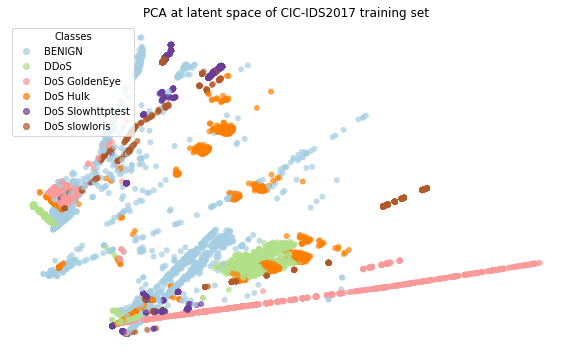

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

X_train_pca, y_train_pca = resample(
    X_train_encode, y_train, n_samples=30000, random_state=42, stratify=y_train)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_train_pca)
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_train_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-IDS2017 training set")
plt.show()

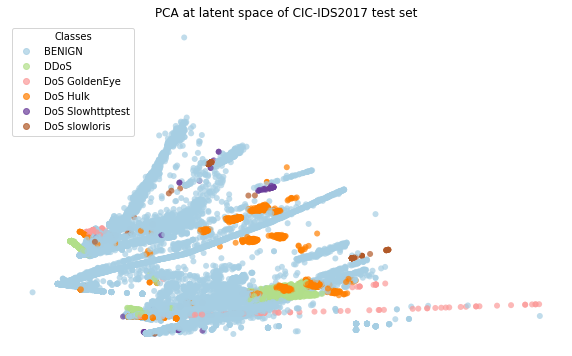

In [12]:
X_test_pca, y_test_pca = resample(
    X_test_encode, y_test, n_samples=100000, random_state=42, stratify=y_train)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_test_pca)
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_test_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-IDS2017 test set")
plt.show()

In [13]:
classifier = Sequential()
classifier.add(Input(shape=(encoding_dim,)))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(classes, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = classifier.fit(X_train_encode,y_train, batch_size=64, epochs=30, 
                         validation_split=0.2, callbacks=[callback])

Epoch 1/30
7500/7500 [==============================] - 16s 2ms/step - loss: 0.4245 - accuracy: 0.8636 - val_loss: 1.4757 - val_accuracy: 0.3565
Epoch 2/30
7500/7500 [==============================] - 17s 2ms/step - loss: 0.2154 - accuracy: 0.9232 - val_loss: 1.4442 - val_accuracy: 0.3496
Epoch 3/30
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1833 - accuracy: 0.9329 - val_loss: 1.2685 - val_accuracy: 0.3636
Epoch 4/30
7500/7500 [==============================] - 17s 2ms/step - loss: 0.1667 - accuracy: 0.9389 - val_loss: 1.1709 - val_accuracy: 0.3632
Epoch 5/30
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1557 - accuracy: 0.9450 - val_loss: 1.0581 - val_accuracy: 0.3630
Epoch 6/30
7500/7500 [==============================] - 17s 2ms/step - loss: 0.1474 - accuracy: 0.9492 - val_loss: 1.0263 - val_accuracy: 0.5890
Epoch 7/30
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1405 - accuracy: 0.9533 - val_loss: 0.9030 - val_ac

In [14]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [15]:
# predicting on training set
y_train_pred_prob = classifier.predict(X_train_encode)
y_test_pred_prob = classifier.predict(X_test_encode)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

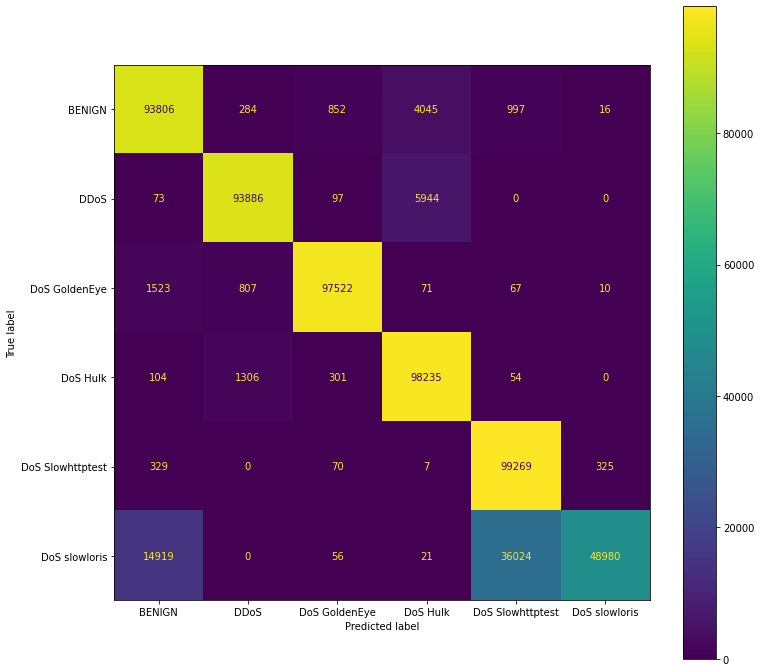

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

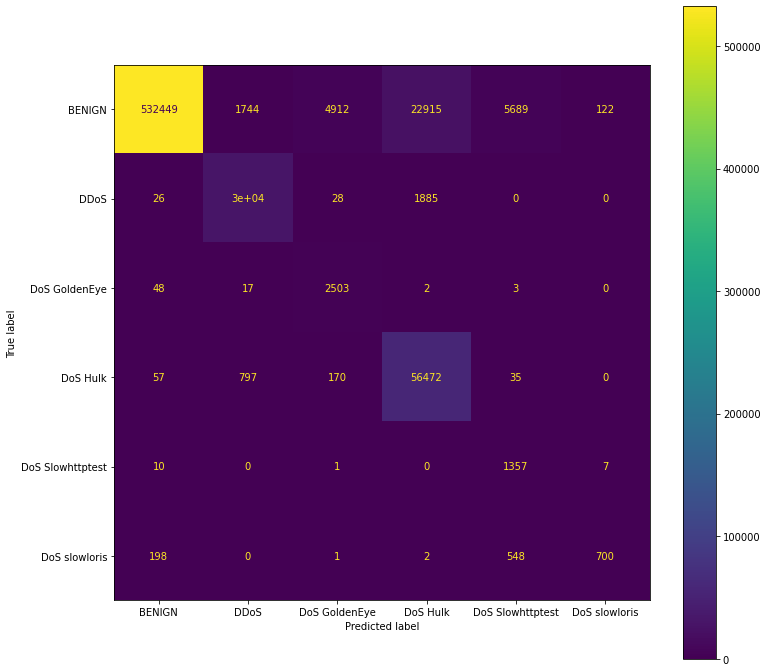

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [18]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [20]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

                  precision    recall  f1-score   support

          BENIGN       0.85      0.94      0.89    100000
            DDoS       0.98      0.94      0.96    100000
   DoS GoldenEye       0.99      0.98      0.98    100000
        DoS Hulk       0.91      0.98      0.94    100000
DoS Slowhttptest       0.73      0.99      0.84    100000
   DoS slowloris       0.99      0.49      0.66    100000

        accuracy                           0.89    600000
       macro avg       0.91      0.89      0.88    600000
    weighted avg       0.91      0.89      0.88    600000



,accuracy,precision,recall,f1_score
BENIGN,0.9614,0.9381,0.847,0.8902
DDoS,0.9858,0.9389,0.9751,0.9566
DoS GoldenEye,0.9936,0.9752,0.9861,0.9806
DoS Hulk,0.9802,0.9824,0.9069,0.9431
DoS Slowhttptest,0.9369,0.9927,0.7277,0.8398
DoS slowloris,0.9144,0.4898,0.9929,0.656


In [21]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

                  precision    recall  f1-score   support

          BENIGN       1.00      0.94      0.97    567831
            DDoS       0.92      0.94      0.93     32006
   DoS GoldenEye       0.33      0.97      0.49      2573
        DoS Hulk       0.69      0.98      0.81     57531
DoS Slowhttptest       0.18      0.99      0.30      1375
   DoS slowloris       0.84      0.48      0.61      1449

        accuracy                           0.94    662765
       macro avg       0.66      0.88      0.69    662765
    weighted avg       0.96      0.94      0.95    662765



In [22]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
BENIGN,0.9461,0.9994,0.9377,0.9675
DDoS,0.9932,0.9216,0.9394,0.9304
DoS GoldenEye,0.9922,0.3287,0.9728,0.4914
DoS Hulk,0.961,0.6948,0.9816,0.8137
DoS Slowhttptest,0.9905,0.1778,0.9869,0.3013
DoS slowloris,0.9987,0.8444,0.4831,0.6146


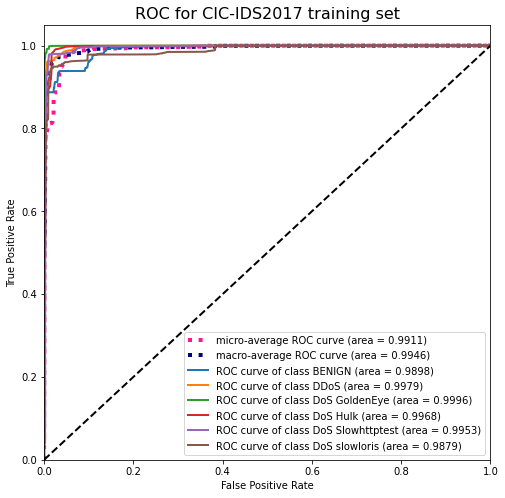

In [23]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for CIC-IDS2017 training set')

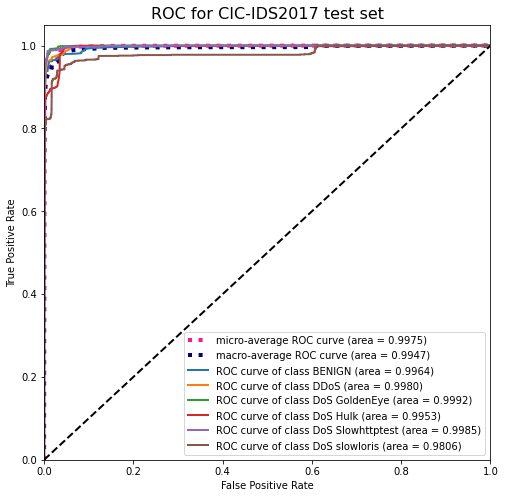

In [24]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for CIC-IDS2017 test set')